# Import the Python Libraries Needed for Climate Data handling

In [1]:

import xarray as xr
import matplotlib.pyplot as plt 
from cartopy.feature import NaturalEarthFeature
import cartopy.crs as ccrs 
import cartopy.feature as cfeature



# Read the Climate data using the library xarray

In [2]:
# rain_data is the variable containing the dataset
rain_data = xr.open_dataset('Ghana_Chirps_data.nc')
rain_data

<xarray.Dataset>
Dimensions:    (time: 10958, longitude: 20, latitude: 30)
Coordinates:
  * time       (time) datetime64[ns] 1991-01-01 1991-01-02 ... 2020-12-31
  * longitude  (longitude) float32 -3.375 -3.125 -2.875 ... 0.875 1.125 1.375
  * latitude   (latitude) float32 4.625 4.875 5.125 5.375 ... 11.38 11.62 11.88
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/17)
    CDI:               Climate Data Interface version 2.0.4 (https://mpimet.m...
    Conventions:       CF-1.6
    institution:       Climate Hazards Group.  University of California at Sa...
    history:           Thu May 30 05:21:22 2024: cdo sellonlatbox,-3.5,1.5,4....
    title:             CHIRPS Version 2.0
    version:           Version 2.0
    ...                ...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
    CDO:               Climate Data Operators version 2.0.4 (https://mpimet.m...

In [3]:
temp = xr.open_dataset('Ghana_ERA5.nc')
temp

<xarray.Dataset>
Dimensions:    (time: 10958, longitude: 20, latitude: 30)
Coordinates:
  * time       (time) datetime64[ns] 1991-01-01T06:00:00 ... 2020-12-31T06:00:00
  * longitude  (longitude) float32 -3.375 -3.125 -2.875 ... 0.875 1.125 1.375
  * latitude   (latitude) float32 4.625 4.875 5.125 5.375 ... 11.38 11.62 11.88
Data variables:
    mm2t       (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu May 30 05:40:27 2024: cdo expr,mm2t=(mn2t+mx2t)/2 Ghana...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

# Identify the variables contained in the dataset using data_vars

In [4]:
rain_data.data_vars

Data variables:
    precip   (time, latitude, longitude) float32 ...

In [5]:
temp.data_vars

Data variables:
    mm2t     (time, latitude, longitude) float32 ...


# Selection of Data Variable to Work With

In [6]:
Rainfall =rain_data['precip']
Rainfall

<xarray.DataArray 'precip' (time: 10958, latitude: 30, longitude: 20)>
[6574800 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1991-01-01 1991-01-02 ... 2020-12-31
  * longitude  (longitude) float32 -3.375 -3.125 -2.875 ... 0.875 1.125 1.375
  * latitude   (latitude) float32 4.625 4.875 5.125 5.375 ... 11.38 11.62 11.88
Attributes:
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    units:               mm/day
    time_step:           day
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

In [7]:
temperature = temp['mm2t']
temperature

<xarray.DataArray 'mm2t' (time: 10958, latitude: 30, longitude: 20)>
[6574800 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1991-01-01T06:00:00 ... 2020-12-31T06:00:00
  * longitude  (longitude) float32 -3.375 -3.125 -2.875 ... 0.875 1.125 1.375
  * latitude   (latitude) float32 4.625 4.875 5.125 5.375 ... 11.38 11.62 11.88

# Identification Of Missing Values

In [8]:
# Count the number of null values in the Rainfall DataArray
null_count = Rainfall.isnull().sum()
print(null_count)

<xarray.DataArray 'precip' ()>
array(679396)


In [9]:
# Count the number of null values in the Max_Temperature DataArray
null_count = temperature.isnull().sum()
print(null_count)

<xarray.DataArray 'mm2t' ()>
array(0)


# Selection of Period Under Study (2009 to 2020)

In [10]:
Rainfall_data = Rainfall.sel(time=slice('2009-01-01','2020-12-31'))
Rainfall_data

<xarray.DataArray 'precip' (time: 4383, latitude: 30, longitude: 20)>
array([[[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.      , 0.      , ..., 0.      , 0.      ],
        [0.      , 0.      , ..., 0.      , 0.      ]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.291908, 0.160088, ..., 0.001868, 0.      ],
        [0.074276, 0.136321, ..., 0.      , 0.      ]],

       ...,

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.      , 0.      , ..., 0.      , 0.      ],
        [0.      , 0.      , ..., 0.      , 0.      ]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.      , 0.      , ..., 0.      , 0.      ],
        [0.      , 0.      , ..., 0.      , 0.      ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2009-01-01 2009-01-02 ... 2020-12-31
  * longitude  (longitude) float32 -3.375 -3.125 -2.875 ... 0.875 1.125 1.375
  * latitude   (latitude) float32 4.625 4.875 5.125 5.375 ... 11.38 11.62 11.88
Attributes:
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    units:               mm/day
    time_step:           day
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

In [11]:
Temperature_data = temperature.sel(time=slice('2009-01-01','2020-12-31'))
Temperature_data

<xarray.DataArray 'mm2t' (time: 4383, latitude: 30, longitude: 20)>
array([[[26.994736, 26.897453, ..., 27.56594 , 27.59358 ],
        [27.009966, 26.896292, ..., 27.433357, 27.45973 ],
        ...,
        [27.459679, 27.426641, ..., 27.863493, 27.753347],
        [27.280725, 27.44157 , ..., 27.32103 , 27.465738]],

       [[27.117165, 26.893219, ..., 26.918032, 26.876925],
        [26.949238, 26.70933 , ..., 26.869001, 26.832092],
        ...,
        [26.458647, 26.457859, ..., 27.524727, 27.483374],
        [26.341038, 26.428547, ..., 26.88939 , 27.043297]],

       ...,

       [[27.503801, 27.51858 , ..., 28.010828, 28.058695],
        [27.461548, 27.483442, ..., 28.03277 , 28.08239 ],
        ...,
        [25.735239, 25.294462, ..., 27.568968, 27.50017 ],
        [25.517685, 25.471529, ..., 26.875015, 27.139595]],

       [[27.530169, 27.521452, ..., 28.234966, 28.189116],
        [27.406187, 27.397413, ..., 28.223412, 28.170874],
        ...,
        [26.616934, 26.466627, ..., 28.15692 , 28.106462],
        [26.219465, 26.357756, ..., 27.50485 , 27.768106]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2009-01-01T06:00:00 ... 2020-12-31T06:00:00
  * longitude  (longitude) float32 -3.375 -3.125 -2.875 ... 0.875 1.125 1.375
  * latitude   (latitude) float32 4.625 4.875 5.125 5.375 ... 11.38 11.62 11.88

# Grouping the data for Annual Mean

In [12]:
Yearly_Precip =Rainfall_data.groupby('time.year').mean('time')
Yearly_Precip

<xarray.DataArray 'precip' (year: 12, latitude: 30, longitude: 20)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [4.6140532, 4.6012096, 5.031332 , ...,       nan,       nan,
               nan],
        ...,
        [2.6408372, 2.6793823, 2.5502672, ..., 2.7302802, 2.7249165,
         2.6091464],
        [2.621313 , 2.68728  , 2.5869503, ..., 2.5857618, 2.5426662,
         2.4902027],
        [2.5400844, 2.5350103, 2.6007276, ..., 2.4015465, 2.3660822,
         2.313492 ]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [4.7045574, 5.187196 , 5.740326 , ...,       nan,       nan,
               nan],
...
        [3.1721041, 3.097566 , 2.9406772, ..., 2.7683585, 2.8717158,
         2.8127067],
        [3.0592093, 3.0697734, 2.9514816, ..., 2.7389312, 2.730102 ,
         2.6740575],
        [2.9923403, 2.9767542, 2.9540498, ..., 2.7288704, 2.5878572,
         2.5098088]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [4.455822 , 4.678322 , 5.049596 , ...,       nan,       nan,
               nan],
        ...,
        [2.9543774, 2.8548415, 2.6682987, ..., 2.767004 , 2.7790809,
         2.7253494],
        [2.8762782, 2.7819889, 2.636106 , ..., 2.6546662, 2.6988528,
         2.6367445],
        [2.7206888, 2.650054 , 2.5412006, ..., 2.544597 , 2.565123 ,
         2.6353967]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -3.375 -3.125 -2.875 ... 0.875 1.125 1.375
  * latitude   (latitude) float32 4.625 4.875 5.125 5.375 ... 11.38 11.62 11.88
  * year       (year) int64 2009 2010 2011 2012 2013 ... 2017 2018 2019 2020

In [13]:
Yearly_Temp =Temperature_data.groupby('time.year').mean('time')
Yearly_Temp

<xarray.DataArray 'mm2t' (year: 12, latitude: 30, longitude: 20)>
array([[[26.154617, 26.15669 , 26.167736, ..., 26.504385, 26.52034 ,
         26.558548],
        [26.080532, 26.083618, 25.956507, ..., 26.475132, 26.521957,
         26.560972],
        [25.967257, 25.942608, 25.791348, ..., 26.431612, 26.484507,
         26.557781],
        ...,
        [28.582655, 28.697367, 28.711369, ..., 29.628063, 29.688452,
         29.69282 ],
        [28.654089, 28.771456, 28.714245, ..., 29.551908, 29.73125 ,
         29.732998],
        [28.636677, 28.864895, 28.886692, ..., 29.29051 , 29.502705,
         29.655136]],

       [[26.52481 , 26.535036, 26.556181, ..., 26.92123 , 26.938465,
         26.968134],
        [26.457577, 26.46857 , 26.352652, ..., 26.901997, 26.940409,
         26.971127],
        [26.29172 , 26.246777, 26.100374, ..., 26.882181, 26.923431,
         26.974648],
...
        [28.66887 , 28.825356, 28.881874, ..., 29.646172, 29.693865,
         29.623857],
        [28.773884, 28.933851, 28.807365, ..., 29.610584, 29.749872,
         29.673437],
        [28.679502, 28.83775 , 28.774416, ..., 29.298475, 29.488077,
         29.59304 ]],

       [[26.572178, 26.577997, 26.58673 , ..., 26.808393, 26.811798,
         26.836628],
        [26.499477, 26.506222, 26.41383 , ..., 26.788666, 26.818653,
         26.844627],
        [26.386303, 26.384472, 26.275114, ..., 26.749563, 26.783398,
         26.840452],
        ...,
        [28.684565, 28.853931, 28.910172, ..., 29.315655, 29.301653,
         29.20655 ],
        [28.725225, 28.893614, 28.78753 , ..., 29.286474, 29.399988,
         29.296318],
        [28.715565, 28.858885, 28.790466, ..., 29.057089, 29.247494,
         29.360163]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -3.375 -3.125 -2.875 ... 0.875 1.125 1.375
  * latitude   (latitude) float32 4.625 4.875 5.125 5.375 ... 11.38 11.62 11.88
  * year       (year) int64 2009 2010 2011 2012 2013 ... 2017 2018 2019 2020

# Spatial plotting of the Annual Temperature and Rainfall Data over Ghana

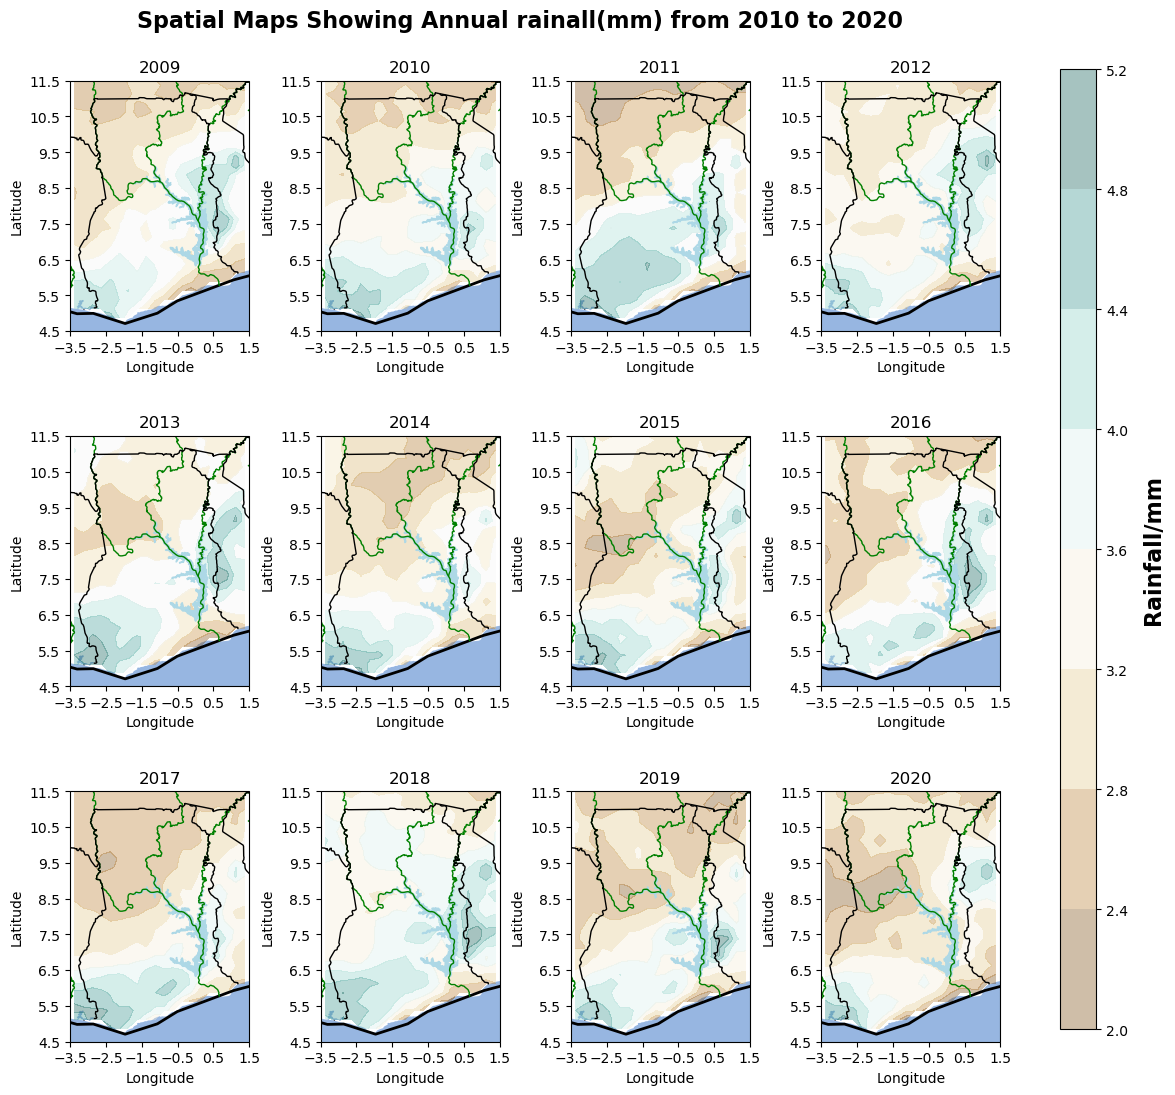

In [14]:
#Spatial Plot for Annual rainfall over Ghana from 2009 to 2020

# The plot size
fig, ax = plt.subplots(3, 4, figsize=(12,12), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten()
# Converts the 2D array of subplots into a 1D array, making it easier to iterate over and manage all subplots.

Years = ['2009','2010', '2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']

# This iteration allows for multiple plots of 12
for i in range(12):
    
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='lightblue')
    rivers = NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m', edgecolor='g', facecolor='none')
    ax[i].add_feature(rivers)
    ax[i].add_feature(cfeature.BORDERS)
    ax[i].set_extent([-3.5, 1.5, 4.5, 11.5], crs=ccrs.PlateCarree())
    ax[i].set_title(Years[i])

    cb = ax[i].contourf(Yearly_Precip.longitude , Yearly_Precip.latitude ,Yearly_Precip[i], 
                        transform=ccrs.PlateCarree(),cmap='BrBG', alpha=0.35)
# Set ticks 
    ax[i].set_xticks([-3.5, -2.5, -1.5, -0.5, 0.5, 1.5])
    ax[i].set_yticks([4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5])

    # Label ticks
    ax[i].set_xlabel('Longitude')
    ax[i].set_ylabel('Latitude')
    
# Remove grid lines
    ax[i].grid(False)
    
# Add colorbar
cbar_kwargs = fig.add_axes([0.95, 0.13, 0.03, 0.8])
cbar = fig.colorbar(cb, cax=cbar_kwargs)
cbar.set_label('Rainfall/mm', fontsize=16, fontweight='bold', labelpad=10)
# labelpad adjusts the distance from the colorbar

# Adjust layout to add spaces between maps
fig.subplots_adjust(wspace=0.4, hspace=0.3, top=0.93)

fig.suptitle('Spatial Maps Showing Annual rainall(mm) from 2010 to 2020', 
             fontsize=16,y=0.98,fontweight='bold')

fig.savefig('2009 to 2020_rain.png', dpi=1200, bbox_inches='tight')
plt.show()

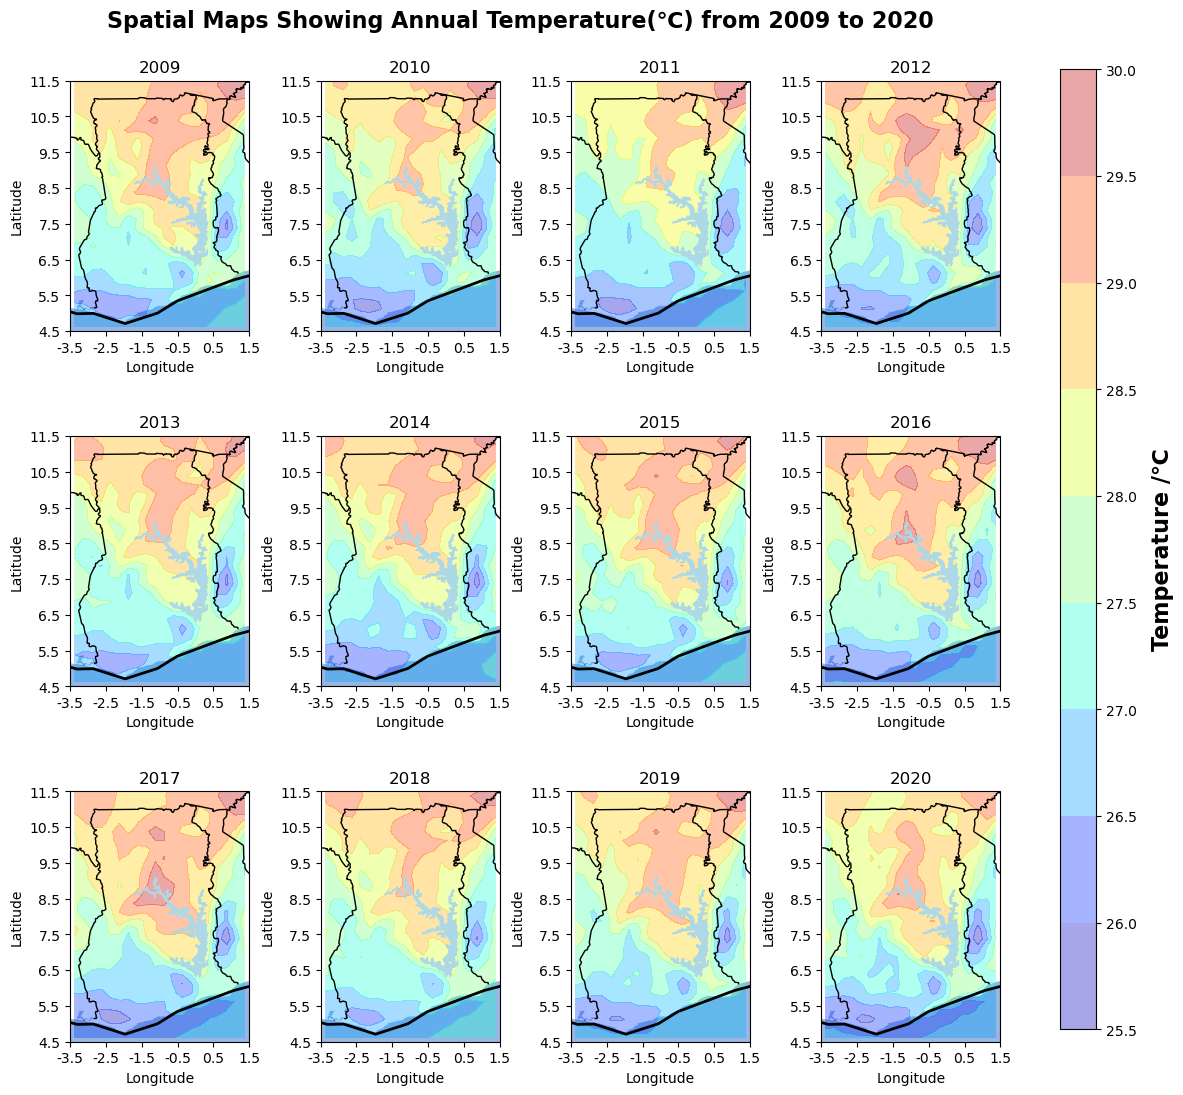

In [15]:
fig, ax = plt.subplots(3, 4, figsize=(12,12), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten()
# Converts the 2D array of subplots into a 1D array, making it easier to iterate over and manage all subplots.
Years = ['2009','2010', '2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']

# This iteration allows for multiple plots of 12
for i in range(12):
    
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='lightblue')
    ax[i].set_extent([-3.5, 1.2, 4.5, 11.5], crs=ccrs.PlateCarree())
    ax[i].set_title(Years[i])
    ax[i].add_feature(cfeature.BORDERS)
    cb = ax[i].contourf(Yearly_Temp.longitude , Yearly_Temp.latitude ,Yearly_Temp[i], 
                        transform=ccrs.PlateCarree(),cmap='jet', alpha=0.35)
# Set ticks
    ax[i].set_xticks([-3.5, -2.5, -1.5, -0.5, 0.5, 1.5])
    ax[i].set_yticks([4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5])

    # Label ticks
    ax[i].set_xticklabels([-3.5, -2.5, -1.5, -0.5, 0.5, 1.5])
    ax[i].set_yticklabels([4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5])
# Label ticks
    ax[i].set_xlabel('Longitude')
    ax[i].set_ylabel('Latitude')
    
    # Remove grid lines
    ax[i].grid(False)
# Add colorbar
cbar_kwargs = fig.add_axes([0.95, 0.13, 0.03, 0.8])
cbar = fig.colorbar(cb, cax=cbar_kwargs)
cbar.set_label('Temperature /℃', fontsize=16, fontweight='bold', labelpad=10)  # labelpad adjusts the distance from the colorbar

# Adjust layout to add spaces between maps
fig.subplots_adjust(wspace=0.4, hspace=0.3, top=0.93)

fig.suptitle('Spatial Maps Showing Annual Temperature(℃) from 2009 to 2020', 
             fontsize=16,y=0.98,fontweight='bold')

fig.savefig('2009 to 2020_temperature.png', dpi=1200, bbox_inches='tight')
plt.show()

# Resampling Yearly Average of the whole time Period

In [16]:
# Resample to yearly mean
yearly_precip = Rainfall.resample(time='Y').mean(dim='time')

# Calculate the mean across all the years
mean_precip = yearly_precip.mean(dim='time')
mean_precip


<xarray.DataArray 'precip' (latitude: 30, longitude: 20)>
array([[      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan],
       [      nan,       nan,       nan,       nan, 4.8628864, 4.321999 ,
        3.6252255,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan],
       [4.418422 , 4.5926433, 4.967841 , 4.70196  , 4.558356 , 4.219877 ,
        4.1784306, 3.692562 , 3.1387534, 2.7157414,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan],
       [4.5380526, 4.6497035, 4.6353116, 4.62313  , 4.5491533, 4.443598 ,
        4.3836617, 4.1372104, 3.7913628, 3.3349452, 3.3367229, 2.7309408,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan],
       [4.47467  , 4.5140815, 4.55238  , 4.437597 , 4.368289 , 4.1593738,
        4.2807717, 4.173685 , 4.0482674, 3.8801928, 3.6704888, 3.2977731,
        2.835293 , 2.209332 , 2.314184 ,       nan,       nan,       nan,
              nan,       nan],
...
       [2.8001742, 2.7153575, 2.6640308, 2.6388624, 2.6778884, 2.7931821,
        2.8948338, 2.740977 , 2.6878166, 2.69177  , 2.6755445, 2.6605012,
        2.6271098, 2.652238 , 2.7761805, 2.732    , 2.838101 , 2.757095 ,
        2.665053 , 2.8905244],
       [2.7055867, 2.638823 , 2.5897894, 2.566587 , 2.6267843, 2.6779697,
        2.6992903, 2.7032292, 2.682733 , 2.6027145, 2.5755775, 2.522241 ,
        2.5563993, 2.546697 , 2.6402926, 2.5479724, 2.6473465, 2.58231  ,
        2.5989122, 2.6684217],
       [2.6253254, 2.61889  , 2.5226262, 2.5282943, 2.5989265, 2.6238763,
        2.6325743, 2.645227 , 2.6637964, 2.6181204, 2.4789095, 2.4477808,
        2.452722 , 2.4737027, 2.5681336, 2.5353656, 2.511378 , 2.4927874,
        2.5287907, 2.5177183],
       [2.5387077, 2.535426 , 2.4914536, 2.4705954, 2.4701133, 2.4776142,
        2.5294864, 2.5319495, 2.4627912, 2.453515 , 2.3660576, 2.4102714,
        2.3642762, 2.3468778, 2.4225192, 2.4320276, 2.3930151, 2.3931386,
        2.4087026, 2.3801546],
       [2.4626284, 2.4401388, 2.4313915, 2.3644185, 2.3540633, 2.3928175,
        2.3913662, 2.3477807, 2.3449278, 2.308756 , 2.2351604, 2.216033 ,
        2.2154992, 2.2461898, 2.4198494, 2.421678 , 2.3382013, 2.276276 ,
        2.254052 , 2.2527661]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -3.375 -3.125 -2.875 ... 0.875 1.125 1.375
  * latitude   (latitude) float32 4.625 4.875 5.125 5.375 ... 11.38 11.62 11.88

In [17]:
# Resample to yearly mean
yearly_Temp = temperature.resample(time='Y').mean(dim='time')

# Calculate the mean across all the years
mean_Temp = yearly_Temp.mean(dim='time')
mean_Temp

<xarray.DataArray 'mm2t' (latitude: 30, longitude: 20)>
array([[26.185873, 26.197071, 26.2113  , 26.195545, 26.164463, 26.13376 ,
        26.11548 , 26.108358, 26.089346, 26.091667, 26.150084, 26.236616,
        26.32475 , 26.357904, 26.408987, 26.4471  , 26.486708, 26.515905,
        26.520618, 26.54322 ],
       [26.1112  , 26.123987, 26.016619, 25.991737, 25.848501, 25.78349 ,
        25.847113, 25.873724, 25.862312, 26.057644, 26.115995, 26.057474,
        26.145506, 26.263226, 26.348454, 26.39034 , 26.450834, 26.49301 ,
        26.524326, 26.547752],
       [25.98353 , 25.961292, 25.829967, 25.616632, 25.362041, 25.35079 ,
        25.51161 , 25.642584, 25.755268, 25.983694, 26.148548, 26.05291 ,
        26.008757, 26.034088, 26.128937, 26.309156, 26.386877, 26.467213,
        26.50248 , 26.553831],
       [25.70447 , 25.671843, 25.67121 , 25.556162, 25.525461, 25.577244,
        25.629633, 25.705296, 25.67862 , 25.778433, 26.125929, 26.528913,
        26.683565, 26.133873, 26.066164, 26.162048, 26.164587, 26.311213,
        26.39375 , 26.474281],
       [25.824451, 25.76357 , 25.770802, 25.808044, 26.00246 , 26.059082,
        26.03037 , 26.290558, 26.272207, 26.154753, 26.142113, 26.258017,
        26.509739, 26.874975, 27.2307  , 26.3695  , 26.104109, 26.247047,
        26.312483, 26.372692],
...
       [28.354374, 28.384268, 28.502073, 28.532637, 28.364227, 28.218103,
        28.167717, 28.276745, 28.398832, 28.60801 , 28.691015, 28.61037 ,
        28.768934, 28.827908, 28.333834, 28.53725 , 28.847162, 29.109915,
        29.168344, 29.14657 ],
       [28.514942, 28.544817, 28.579382, 28.606434, 28.487818, 28.250877,
        28.202995, 28.214357, 28.33127 , 28.484398, 28.56734 , 28.624887,
        28.783163, 28.89785 , 28.57549 , 28.799578, 29.076347, 29.289776,
        29.308117, 29.286346],
       [28.491632, 28.642069, 28.67403 , 28.600292, 28.59329 , 28.375212,
        28.254108, 28.258472, 28.30888 , 28.461025, 28.631565, 28.690666,
        28.783735, 28.85473 , 28.779112, 28.954378, 29.22901 , 29.419016,
        29.432123, 29.383564],
       [28.531385, 28.68457 , 28.611305, 28.425415, 28.590668, 28.437372,
        28.299557, 28.3083  , 28.326221, 28.454634, 28.629242, 28.731995,
        28.821503, 28.82357 , 28.865444, 28.93093 , 29.084435, 29.33297 ,
        29.503119, 29.44854 ],
       [28.49643 , 28.655445, 28.646402, 28.31971 , 28.460182, 28.478664,
        28.342388, 28.34413 , 28.274784, 28.450237, 28.704128, 28.848942,
        28.757652, 28.67752 , 28.759531, 28.789968, 28.920225, 29.082012,
        29.30506 , 29.423347]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -3.375 -3.125 -2.875 ... 0.875 1.125 1.375
  * latitude   (latitude) float32 4.625 4.875 5.125 5.375 ... 11.38 11.62 11.88

# Plotting the Yearly Average Across the Period

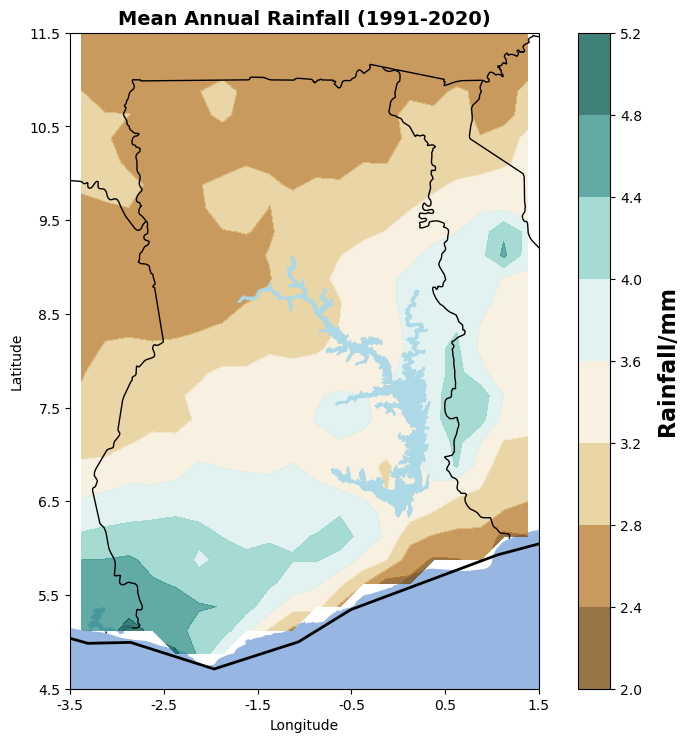

In [18]:
# Plot the Yearly Mean rainfalldata
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 8))

ax.add_feature(cfeature.COASTLINE.with_scale('110m'), linewidth=2)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, color='lightblue')
ax.add_feature(cfeature.BORDERS)
ax.set_extent([-3.5, 1.5, 4.5, 11.5], crs=ccrs.PlateCarree())

# Set ticks and labels
ax.set_xticks([-3.5, -2.5, -1.5, -0.5, 0.5, 1.5])
ax.set_yticks([4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]) 
ax.set_xticklabels([-3.5, -2.5, -1.5, -0.5, 0.5, 1.5])
ax.set_yticklabels([4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Plot the mean precipitation data
cb = ax.contourf(mean_precip.longitude, mean_precip.latitude, mean_precip,
                 transform=ccrs.PlateCarree(), cmap='BrBG', alpha=0.75)
# Remove grid lines
ax.grid(False)
    
# Add colorbar
cbar = fig.colorbar(cb, ax=ax, orientation='vertical')
cbar.set_label('Rainfall/mm', fontsize=16, fontweight='bold', labelpad=10)
# Set the title
ax.set_title('Mean Annual Rainfall (1991-2020)', fontsize=14, fontweight='bold')

# Adjust layout to add spaces between maps
fig.subplots_adjust(wspace=0.3, hspace=0.3, top=0.93)

# Save the figure
fig.savefig('mean_annual_rainfall_1991_2020.png', dpi=1200, bbox_inches='tight')
plt.show()

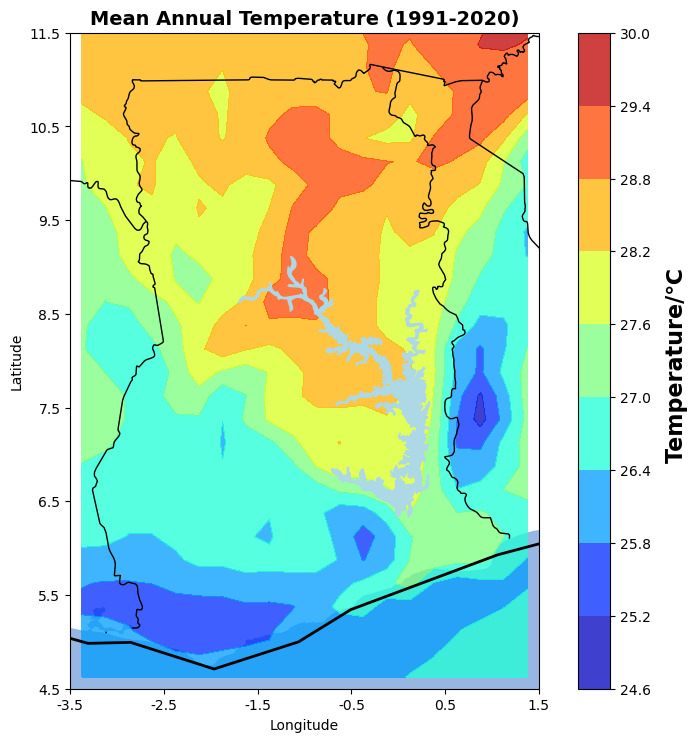

In [19]:
# Plot the Yearly Mean rainfalldata
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 8))

ax.add_feature(cfeature.COASTLINE.with_scale('110m'), linewidth=2)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, color='lightblue')
ax.add_feature(cfeature.BORDERS)
ax.set_extent([-3.5, 1.5, 4.5, 11.5], crs=ccrs.PlateCarree())

# Set ticks and labels
ax.set_xticks([-3.5, -2.5, -1.5, -0.5, 0.5, 1.5])
ax.set_yticks([4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5])
ax.set_xticklabels([-3.5, -2.5, -1.5, -0.5, 0.5, 1.5])
ax.set_yticklabels([4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Plot the mean temperature data
cb = ax.contourf(mean_Temp.longitude, mean_Temp.latitude, mean_Temp,
                 transform=ccrs.PlateCarree(), cmap='jet', alpha=0.75)
# Remove grid lines
ax.grid(False)
    
# Add colorbar
cbar = fig.colorbar(cb, ax=ax, orientation='vertical')
cbar.set_label('Temperature/℃ ', fontsize=16, fontweight='bold', labelpad=10)
# Set the title
ax.set_title('Mean Annual Temperature (1991-2020)', fontsize=14, fontweight='bold')

# Adjust layout to add spaces between maps
fig.subplots_adjust(wspace=0.3, hspace=0.3, top=0.93)

# Save the figure
fig.savefig('mean_annual_rainfall_1991_2020.png', dpi=1200, bbox_inches='tight')
plt.show()

# Resampling to get monthly_mean across the years (1991 to 2020)

In [20]:
Monthly_rain =Rainfall.resample(time='M').mean()
monthly_mean_rain = Monthly_rain.groupby('time.month').mean(dim='time')
monthly_mean_rain

<xarray.DataArray 'precip' (month: 12, latitude: 30, longitude: 20)>
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [7.39107788e-01, 8.02845597e-01, 8.90232742e-01, ...,
                    nan,            nan,            nan],
        ...,
        [1.11607499e-02, 6.85768062e-03, 4.58053034e-03, ...,
         5.72573743e-04, 1.00399356e-03, 3.48126655e-03],
        [1.02176061e-02, 7.36525934e-03, 3.49502545e-03, ...,
         4.42951656e-04, 2.73160171e-04, 3.39642254e-04],
        [9.67470370e-03, 8.44978355e-03, 8.04560166e-03, ...,
         1.92265186e-04, 1.70949657e-04, 1.37289462e-04]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [1.53742957e+00, 1.46472788e+00, 1.51048231e+00, ...,
                    nan,            nan,            nan],
...
        [1.01702482e-01, 7.42672607e-02, 8.61806348e-02, ...,
         5.30539341e-02, 5.02589345e-02, 6.77241012e-02],
        [6.74558654e-02, 5.68572916e-02, 6.26711473e-02, ...,
         4.42343690e-02, 4.07781228e-02, 5.86656742e-02],
        [4.43912782e-02, 3.79519463e-02, 3.84141915e-02, ...,
         2.25156527e-02, 2.38940306e-02, 2.24043205e-02]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [1.76197231e+00, 2.02990246e+00, 2.65133667e+00, ...,
                    nan,            nan,            nan],
        ...,
        [2.72150822e-02, 2.53903456e-02, 2.44028438e-02, ...,
         5.87198325e-03, 5.94450394e-03, 8.92123766e-03],
        [2.12459769e-02, 2.26289500e-02, 2.10038424e-02, ...,
         4.06138459e-03, 2.66798469e-03, 4.92874486e-03],
        [1.87841710e-02, 1.96864400e-02, 1.86266899e-02, ...,
         3.99955595e-03, 2.78103026e-03, 2.65787216e-03]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -3.375 -3.125 -2.875 ... 0.875 1.125 1.375
  * latitude   (latitude) float32 4.625 4.875 5.125 5.375 ... 11.38 11.62 11.88
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [21]:
Monthly_temp =temperature.resample(time='M').mean()
monthly_mean_temp = Monthly_temp.groupby('time.month').mean(dim='time')
monthly_mean_temp

<xarray.DataArray 'mm2t' (month: 12, latitude: 30, longitude: 20)>
array([[[26.949038, 26.965208, 26.971691, ..., 27.217394, 27.202456,
         27.216413],
        [26.910572, 26.930056, 26.800877, ..., 27.175316, 27.185253,
         27.201176],
        [26.864136, 26.918974, 26.788319, ..., 27.114323, 27.126978,
         27.169422],
        ...,
        [26.811098, 26.849096, 26.753191, ..., 27.854797, 27.798628,
         27.718946],
        [26.542784, 26.58006 , 26.203686, ..., 27.368774, 27.589783,
         27.509466],
        [26.168581, 26.221842, 25.890356, ..., 26.58688 , 26.917332,
         27.09726 ]],

       [[27.151716, 27.173908, 27.184935, ..., 27.586542, 27.582977,
         27.606516],
        [27.076548, 27.101915, 27.051325, ..., 27.552923, 27.578772,
         27.604351],
        [27.083557, 27.113028, 27.069221, ..., 27.510744, 27.540733,
         27.593544],
...
        [28.363993, 28.60125 , 28.544077, ..., 29.456657, 29.46242 ,
         29.294722],
        [28.343584, 28.585512, 28.33949 , ..., 29.38418 , 29.563334,
         29.379154],
        [28.090454, 28.427067, 28.302769, ..., 28.933098, 29.23361 ,
         29.381956]],

       [[27.002228, 27.015203, 27.049604, ..., 27.42515 , 27.427473,
         27.43842 ],
        [26.977215, 26.990076, 26.788477, ..., 27.45345 , 27.46688 ,
         27.477648],
        [26.76125 , 26.682095, 26.412664, ..., 27.450481, 27.471478,
         27.502375],
        ...,
        [27.069727, 27.112902, 26.968113, ..., 28.23979 , 28.226908,
         28.106596],
        [26.851713, 26.893358, 26.495832, ..., 27.901386, 28.113008,
         27.988638],
        [26.454397, 26.571743, 26.256336, ..., 27.180393, 27.5122  ,
         27.677858]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -3.375 -3.125 -2.875 ... 0.875 1.125 1.375
  * latitude   (latitude) float32 4.625 4.875 5.125 5.375 ... 11.38 11.62 11.88
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

# Plotting a Monthly Avearge for the Entire Period (1991 to 2020) 

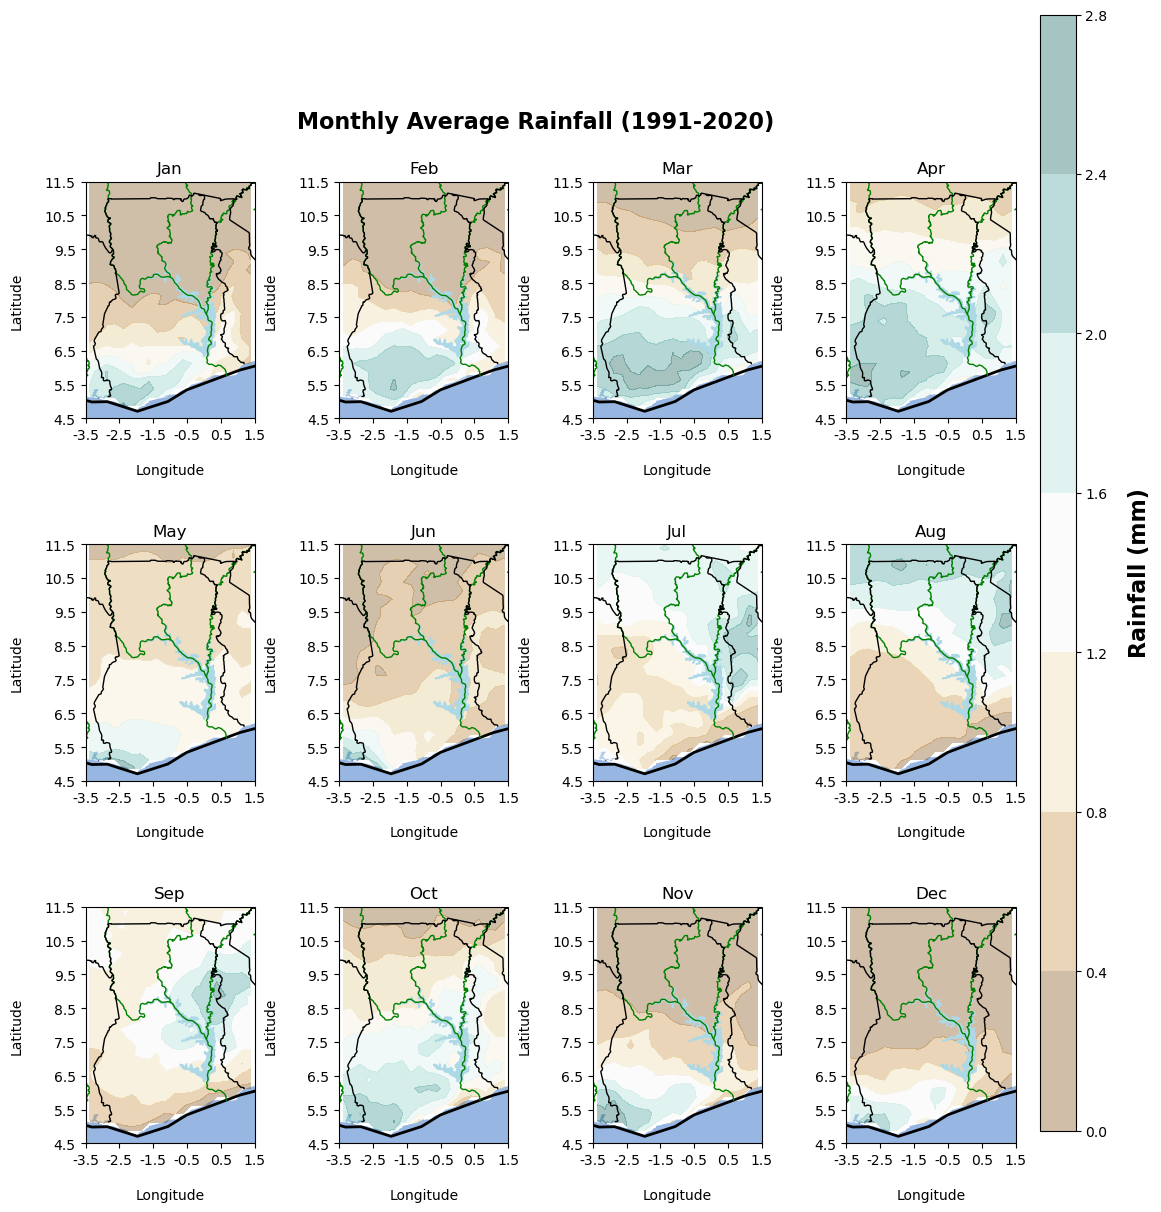

In [22]:
# Spatial Plot for monthly average for rainfall across Ghana
fig, ax = plt.subplots(3, 4, figsize=(12,12), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten()
# Converts the 2D array of subplots into a 1D array, making it easier to iterate over and manage all subplots.
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# This iteration allows for multiple plots of 12
for i in range(12):
    
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='lightblue')
    rivers = NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m', edgecolor='g', facecolor='none')
    ax[i].add_feature(rivers)
    ax[i].add_feature(cfeature.BORDERS)
    ax[i].set_extent([-3.5, 1.5, 4.5, 11.5], crs=ccrs.PlateCarree())
    ax[i].set_title(months[i])

    cb = ax[i].contourf(monthly_mean_rain.longitude , monthly_mean_rain.latitude ,monthly_mean_rain[i], 
                        transform=ccrs.PlateCarree(),cmap='BrBG', alpha=0.35)
# Set ticks
    ax[i].set_xticks([-3.5, -2.5, -1.5, -0.5, 0.5, 1.5])
    ax[i].set_yticks([4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5])

    # Label ticks
    ax[i].set_xticklabels([-3.5, -2.5, -1.5, -0.5, 0.5, 1.5])
    ax[i].set_yticklabels([4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5])
    ax[i].set_xlabel('Longitude', labelpad=15)
    ax[i].set_ylabel('Latitude', labelpad=15)

# Remove grid lines
    ax[i].grid(False)

# Add colorbar with proper spacing
cbar_kwargs = fig.add_axes([0.92, 0.13, 0.03, 0.93])  # Adjusted position and size
cbar = fig.colorbar(cb, cax=cbar_kwargs)
cbar.set_label('Rainfall (mm)', fontsize=16, fontweight='bold', labelpad=15) 
# Adjust label properties

# Adjust layout to add spaces between maps
fig.subplots_adjust(wspace=0.5, hspace=0.4, top=0.93)

fig.suptitle('Monthly Average Rainfall (1991-2020)', 
             fontsize=16,y=0.98,fontweight='bold')

fig.savefig('Monthly_2009 to 2020_rain.png', dpi=1200, bbox_inches='tight')
plt.show()



















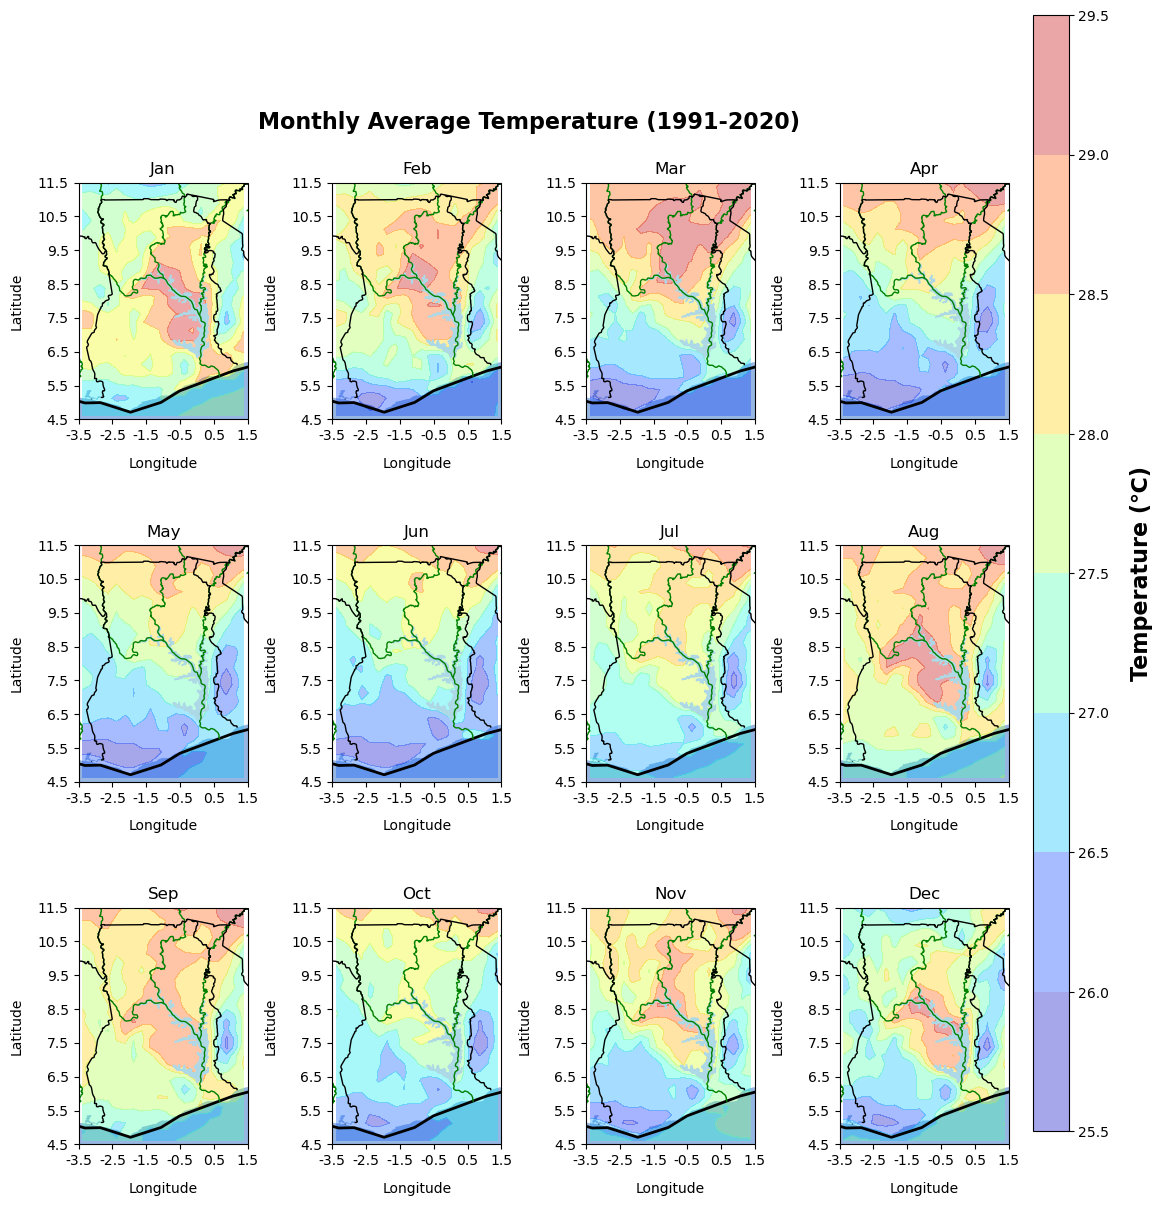

In [23]:
# Spatial Plot for monthly average for temperature across Ghana
fig, ax = plt.subplots(3, 4, figsize=(12,12), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten()
# Converts the 2D array of subplots into a 1D array, making it easier to iterate over and manage all subplots.
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# This iteration allows for multiple plots of 12
for i in range(12):
    
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='lightblue')
    rivers = NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m', edgecolor='g', facecolor='none')
    ax[i].add_feature(rivers)
    ax[i].add_feature(cfeature.BORDERS)
    ax[i].set_extent([-3.5, 1.5, 4.5, 11.5], crs=ccrs.PlateCarree())
    ax[i].set_title(months[i])

    cb = ax[i].contourf(monthly_mean_temp.longitude , monthly_mean_temp.latitude ,monthly_mean_temp[i], 
                        transform=ccrs.PlateCarree(),cmap='jet', alpha=0.35)
# Set ticks
    ax[i].set_xticks([-3.5, -2.5, -1.5, -0.5, 0.5, 1.5])
    ax[i].set_yticks([4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5])

    # Label ticks
    ax[i].set_xticklabels([-3.5, -2.5, -1.5, -0.5, 0.5, 1.5])
    ax[i].set_yticklabels([4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5])
    ax[i].set_xlabel('Longitude', labelpad=10)
    ax[i].set_ylabel('Latitude', labelpad=10)
    
    # Remove grid lines
    ax[i].grid(False)

# Add colorbar with proper spacing
cbar_kwargs = fig.add_axes([0.92, 0.13, 0.03, 0.93])  # Adjusted position and size
cbar = fig.colorbar(cb, cax=cbar_kwargs)
cbar.set_label('Temperature (℃)', fontsize=16, fontweight='bold', labelpad=15) 
# Adjust label properties

# Adjust layout to add spaces between maps
fig.subplots_adjust(wspace=0.5, hspace=0.4, top=0.93)

fig.suptitle('Monthly Average Temperature (1991-2020)', 
             fontsize=16,y=0.98,fontweight='bold')

fig.savefig('Monthly_2009 to 2020_Temperature.png', dpi=1200, bbox_inches='tight')
plt.show()



# Extracting point Location

In [24]:

# Select the years range from 1991 to 2020 for rainfall and temperature
precip = Rainfall.resample(time='Y').mean(dim='time')
temp = temperature.resample(time='Y').mean(dim='time')

# Define locations
locations = {
    'Kintampo': {'longitude': -1.72, 'latitude': 8.05},
    'Navrongo': {'longitude': -1.10, 'latitude': 10.90},
    'Dodowa': {'longitude': -0.09856, 'latitude': 5.88301}
}

# Extract rainfall data for the specified locations
rainfall_data = {}
for loc_name, coords in locations.items():
    rainfall_data[loc_name] = precip.sel(longitude=coords['longitude'], latitude=coords['latitude'], method='nearest')


C:\Users\Admin\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\Admin\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\Admin\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\Admin\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.


# Check for available line style in matplotlib

In [25]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


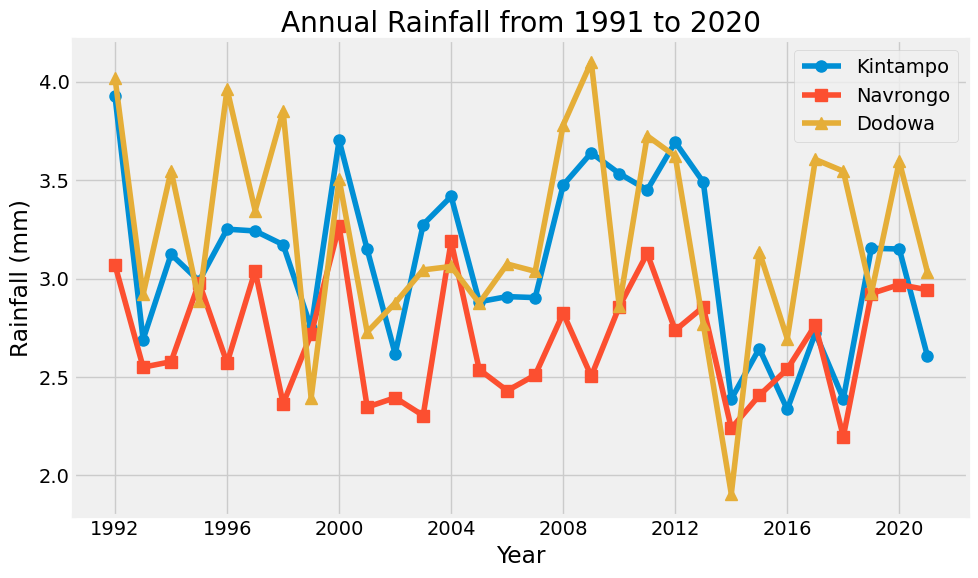

In [26]:

# Plot the rainfall data for the three locations
plt.figure(figsize=(10, 6))

# Plot style used
plt.style.use('fivethirtyeight')

markers = {'Kintampo': 'o', 'Navrongo': 's', 'Dodowa': '^'}  # Circle, Square, Triangle

for loc_name, data in rainfall_data.items():
    plt.plot(data['time'], data, label=loc_name, marker=markers[loc_name], linestyle='-', markersize=8)

plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Annual Rainfall from 1991 to 2020')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Admin\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\Admin\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\Admin\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\Admin\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.


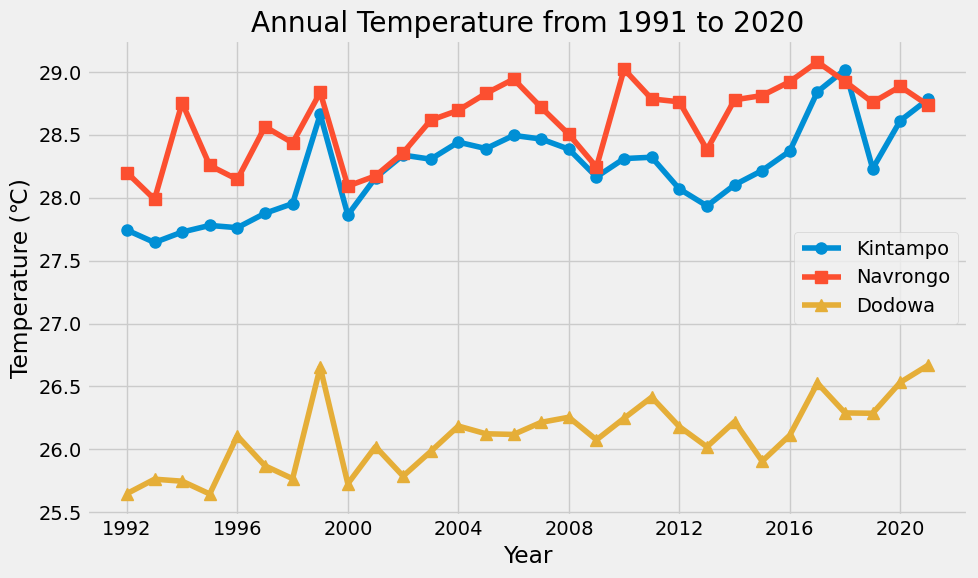

In [27]:

# Extract rainfall data for the specified locations
rainfall_data = {}
for loc_name, coords in locations.items():
    rainfall_data[loc_name] = temp.sel(longitude=coords['longitude'], latitude=coords['latitude'], method='nearest')

# Plot the temperature data for the three locations
plt.figure(figsize=(10, 6))

# Plot style used
plt.style.use('fivethirtyeight')

markers = {'Kintampo': 'o', 'Navrongo': 's', 'Dodowa': '^'}  # Circle, Square, Triangle

for loc_name, data in rainfall_data.items():
    plt.plot(data['time'], data, label=loc_name, marker=markers[loc_name], linestyle='-', markersize=8)

plt.xlabel('Year')
plt.ylabel('Temperature (℃)')
plt.title('Annual Temperature from 1991 to 2020')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
